In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from tqdm.auto import tqdm
sys.path.append("../")
import library
import math

C:\Users\cdipt\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Question 1

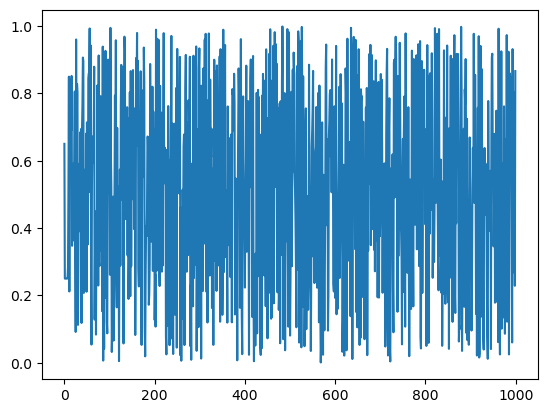

In [2]:
x1 = library.random.LGC(a=65, m=1021, c=0, no_sample=1000, x0=0.01,)
plt.plot(x1)

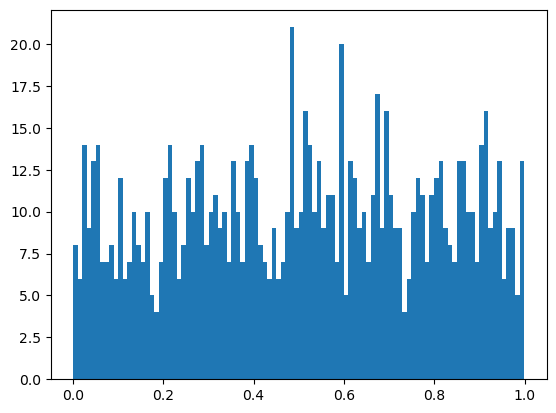

In [3]:
plt.hist(x1, bins = 100)
plt.show()

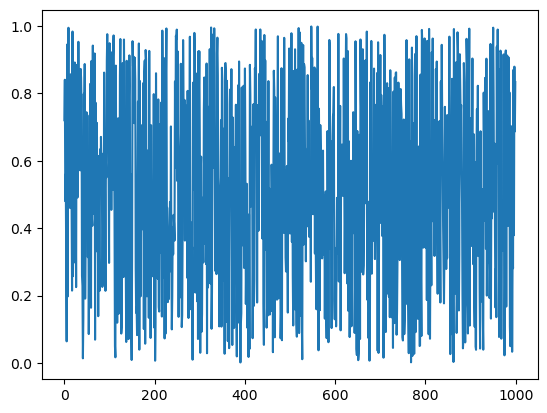

In [4]:
x2 = library.random.LGC(a=572, m=16381, c=0, no_sample=1000, x0=0.01,)
plt.plot(x2)

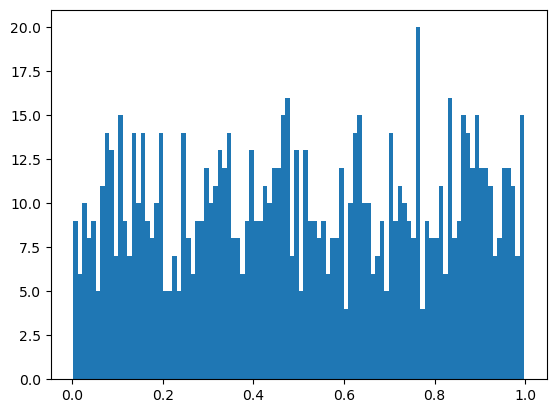

In [5]:
plt.hist(x2, bins = 100)
plt.show()

# Question 2

In [6]:
# The rng can be made much better by using suitable parameters.

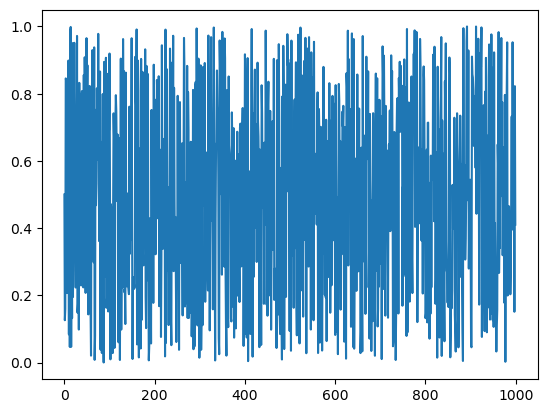

In [7]:
x2 = library.random.LGC(no_sample=1000) # Using default parameters
plt.plot(x2)

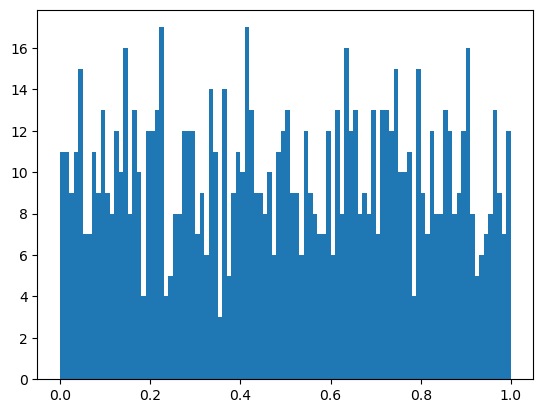

In [189]:
plt.hist(x2,bins = 100)
plt.show()

In [9]:
limit = (-1*math.pi/2,math.pi/2)
cos = lambda x: math.cos(x)
integral = []
delta = []
iter = []
for i in tqdm(range(1000,101_000,1000)):
    iter.append(i)
    a,b= library.integration.monte_carlo_integration(N=i,limit=limit,func=cos)
    integral.append(a)
    delta.append(b)

  0%|          | 0/100 [00:00<?, ?it/s]

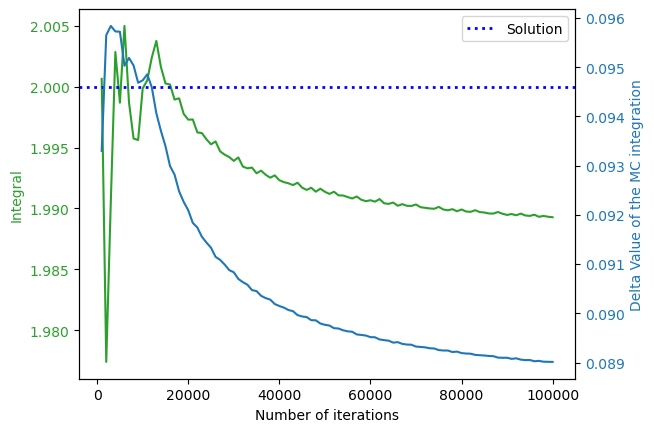

In [10]:
# Create a figure and an axis
fig, ax1 = plt.subplots()

# Plotting the first line
color = 'tab:green'
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Integral', color=color)
ax1.plot(iter,integral, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Delta Value of the MC integration', color=color)
ax2.plot(iter,delta, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=2, color='b', linestyle=':', linewidth=2, label='Solution')
ax1.legend()



# Question 3

### The inverse cumulative distribution function of the given function is 
$y = -\frac{1}{2}log(2x)$

In [79]:
def F(x):
    return -0.5*math.log(2*x)

In [84]:
x = library.random.LGC(no_sample=2000)
y_inverse_transform = []
for item in x:
    y_inverse_transform.append(F(item))

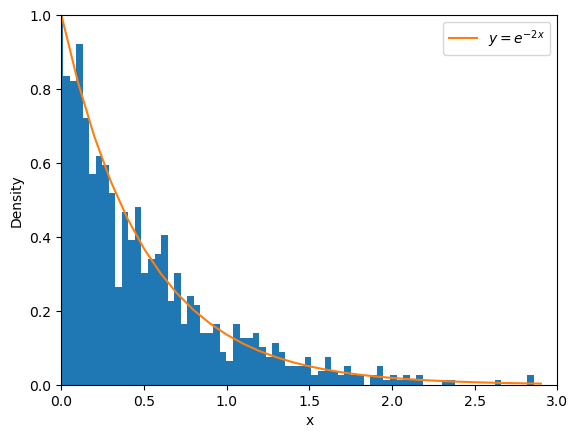

In [97]:
plt.hist(y_inverse_transform,bins = 100,density = True)
plt.plot(np.arange(0,3,0.1),np.exp(-2*np.arange(0,3,0.1)), label = r"$y = e^{-2x}$")
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

In [99]:
def sampling_dist(x):
    return 2-x
def target_dist(x):
    return math.exp(-2*x)

In [153]:
s = library.random.LGC(no_sample=100000)
x = s[:50000]
u = s[50000:]
C = 1.8


In [154]:
samples = []
i = 0
while len(samples) < 2000:
    if u[i] <= target_dist(x[i])/(C*sampling_dist(x[i])):
        samples.append(x[i])
    i = i+1

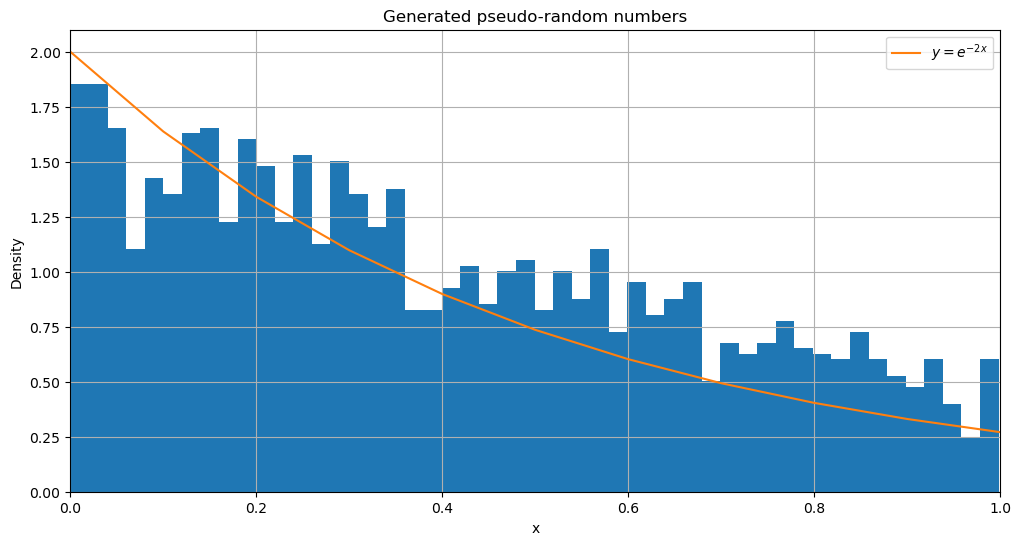

In [187]:
plt.figure(figsize = (12,6))
plt.hist(samples, bins=50, density=True)
plt.plot(np.arange(0,3,0.1),2*np.exp(-2*np.arange(0,3,0.1)), label = r"$y = e^{-2x}$")
plt.xlim(0,1)
plt.ylabel('Density')
plt.grid()
plt.xlabel('x')
plt.title('Generated pseudo-random numbers')
plt.legend()
plt.show()

In [156]:
# Clearly the generated samples are not very statistically accurate the reason is due to the poor
#random numbers generated by the trivial LCG generator now trying with numpy's pRNG

In [183]:
C = 100
samples = []
i = 0
while len(samples) < 2000:
    x = np.random.uniform(0, 1)
    u = np.random.uniform(0, 1)
    if u <= target_dist(x) / (C* sampling_dist(x)):
        samples.append(x)
    i = i+1

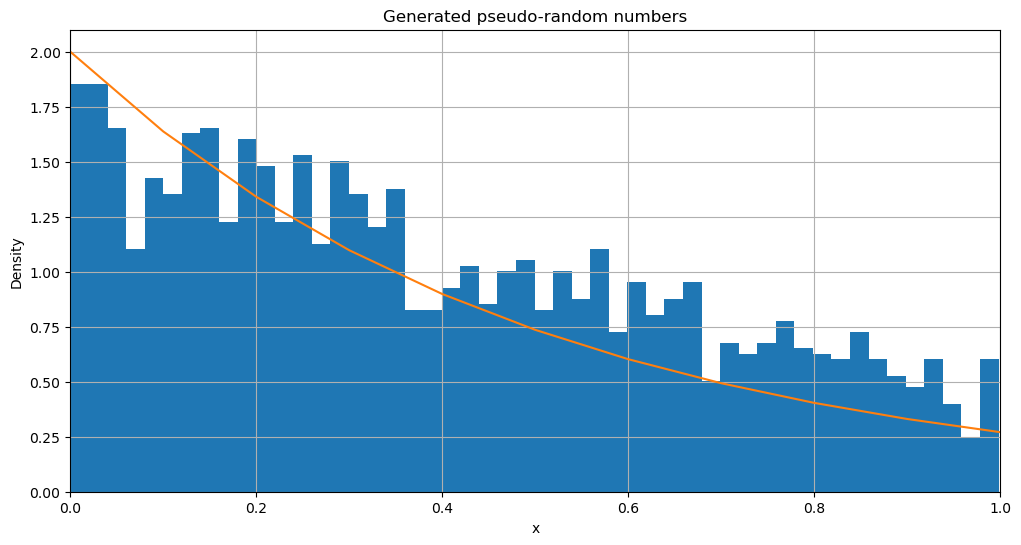

In [185]:
plt.figure(figsize = (12,6))
plt.hist(samples, bins=50, density=True)
plt.plot(np.arange(0,3,0.1),2*np.exp(-2*np.arange(0,3,0.1)), label = r"$y = e^{-2x}$")
plt.xlim(0,1)
plt.ylabel('Density')
plt.grid()
plt.xlabel('x')
plt.title('Generated pseudo-random numbers')
plt.show()

In [186]:
# No improvement, shows that the main problem is the sampling function

# Question4

In [203]:
limit = (0,2)
N = 10_000
func = lambda x:math.exp(-2*x)/(1+x**2)

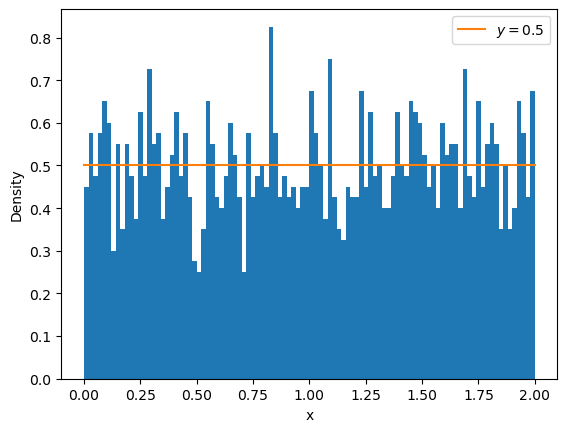

In [346]:
def F1(x):
    return 2*x
def p1(x):
    return 0.5

x = library.random.LGC(no_sample=2000)
y_inverse_transform = []
for item in x:
    y_inverse_transform.append(F1(item))
    
plt.hist(y_inverse_transform,bins = 100,density = True)
plt.plot(np.arange(0,2.1,0.1),0.5*np.exp(0*np.arange(0,2.1,0.1)), label = r"$y = 0.5$")
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

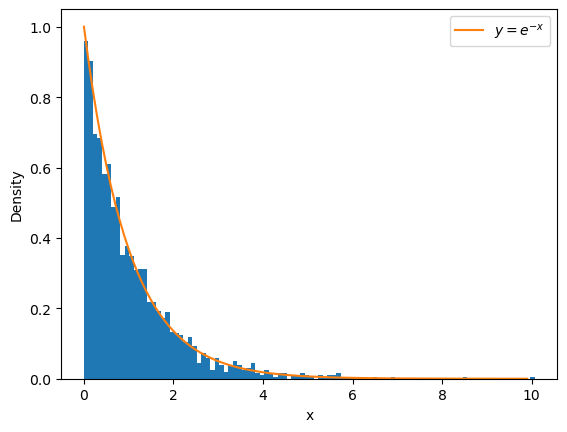

In [347]:
def F2(x):
    return -1*math.log(1-x)
def p2(x):
    return math.exp(-x)

x = library.random.LGC(no_sample=2000)
y_inverse_transform = []
for item in x:
    y_inverse_transform.append(F2(item))
    
plt.hist(y_inverse_transform,bins = 100,density = True)
plt.plot(np.arange(0,10,0.1),np.exp(-1*np.arange(0,10,0.1)), label = r"$y = e^{-x}$")
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

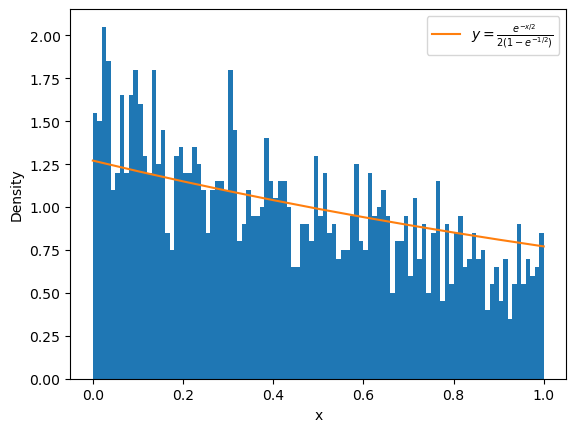

In [348]:
def F3(x): #After normalising
    return -1*math.log(1+x*(math.exp(-1)-1))
def p3(x):
    return (math.exp(-x/2))/(2*(1-math.exp(-0.5)))

x = library.random.LGC(no_sample=2000)
y_inverse_transform = []
for item in x:
    y_inverse_transform.append(F3(item))
    
plt.hist(y_inverse_transform,bins = 100,density = True)
plt.plot(np.arange(0,1.1,0.1),1*np.exp(-1*np.arange(0,1.1,0.1)/2)/(2*(1-math.exp(-0.5))), label = r"$y = \frac{e^{-x/2}}{2(1-e^{-1/2})}$")
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

In [345]:
def monte_carlo_integration_important(N,limit,func,gen,p):
    """
    monte_carlo_integration: A function to calculate the integral of a function using the Monte-Carlo
    integration method

    args:
    N(int): The number of smaples to take for integration
    limit(Tupe): A tuple of the form (a,b) where a is the lower and b is the upper limit
    func(Method Object): The function which needs to be integrated
    """
    
    a,b = limit
    x = library.random.LGC(no_sample=N)
#     x = list(map(lambda si: a + (b-a)*si,x))

    weights = []
    for i in range(N):
        weights.append(func(gen(x[i]))/p(gen(x[i])))
    return np.array(weights).mean(),np.array(weights).var() 

In [349]:
F_uniform = lambda x:x
integral_F1,delta_F1 = monte_carlo_integration_important(N = 10000,
                                                         limit=(0,2),
                                                         func = func,
                                                         gen=F1,
                                                         p=p1)
integral_F2,delta_F2 = monte_carlo_integration_important(N = 10000,
                                                         limit=(0,2),
                                                         func = func,
                                                         gen=F2,
                                                         p=p2)
integral_F3,delta_F3 = monte_carlo_integration_important(N = 10000,
                                                         limit=(0,2),
                                                         func = func,
                                                         gen=F3,
                                                         p=p3)

In [354]:
print("Using the first function the value of the integral is ",integral_F1)
print("Using the second function the value of the integral is ",integral_F2)
print("Using the third function the value of the integral is ",integral_F3)
print("---------------------------------------------------------------")
print("The variance of the intergral using the first function is",delta_F1)
print("The variance of the intergral using the second function is",delta_F2)
print("The variance of the intergral using the third function is",delta_F3)


Using the first function the value of the integral is  0.3907249541754041
Using the second function the value of the integral is  0.39428105091169807
Using the third function the value of the integral is  0.40224042490967055
---------------------------------------------------------------
The variance of the intergral using the first function is 0.26593064816825795
The variance of the intergral using the second function is 0.10503066742571228
The variance of the intergral using the third function is 0.04440296375388081


### Hence as we make the sampling more specialised the variance reduces sugesting a faster convergence